# Import Packages

In [49]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [50]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Reading data from Excel and Data Cleaning

In [51]:
#Reading Excel file
dt=pd.read_excel("ASX200-SE-indexes.xlsx")
#Start with 28/7/1995
dat=dt.iloc[0:]
dat.head(10)

,Date,ASX200,SSE
0,28/7/1995,2087.8,721.506
1,31/7/1995,2083.3,721.007
2,1995-01-08 00:00:00,2087.6,741.821
3,1995-02-08 00:00:00,2107.0,724.914
4,1995-03-08 00:00:00,2108.2,728.542
5,1995-04-08 00:00:00,2119.9,735.500
6,1995-07-08 00:00:00,2118.7,743.980
7,1995-08-08 00:00:00,2112.9,737.700
8,1995-09-08 00:00:00,2116.5,743.230
9,1995-10-08 00:00:00,2105.6,761.920


In [52]:
#Renaming Columns
dat_cols =['Date','ASX','SSE']
dat.columns= dta_cols
dat.tail(10)

,Date,ASX,SSE
5209,16/7/2015,5669.6,4005.753
5210,17/7/2015,5670.1,4146.027
5211,20/7/2015,5686.9,4182.637
5212,21/7/2015,5706.7,4209.508
5213,22/7/2015,5614.6,4218.309
5214,23/7/2015,5590.3,4320.844
5215,24/7/2015,5566.1,4265.340
5216,27/7/2015,5589.9,3903.456
5217,28/7/2015,5584.7,3836.990
5218,29/7/2015,5624.2,3969.366


# Computing Daily Returns

Daily Returns can be computed using the following formula:
$$R= ln(P_{t}/P_{t-1})$$
To express it in $\%$ we multiply the above by 100.

In Python, we can use the following 
data['R'] = 100*np.log(data['P']/data['P'].shift(1).dropna() 


NB: We add shift(1) to show the lag in price and then drop N/A by using dropna() at the end

In [53]:
#ASX200 Stock Index Returns 
dat['R_a'] = 100*np.log(dat['ASX']/dat['ASX'].shift(1)).dropna()
#SSE Index returns
dat['R_sse'] =100*np.log(dat['SSE']/dat['SSE'].shift(1)).dropna()
data=dat.dropna()
data.head()

<ipython-input-1-678c7c365f59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['R_a'] = 100*np.log(dat['ASX']/dat['ASX'].shift(1)).dropna()
<ipython-input-1-678c7c365f59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['R_sse'] =100*np.log(dat['SSE']/dat['SSE'].shift(1)).dropna()


,Date,ASX,SSE,R_a,R_sse
1,31/7/1995,2083.3,721.007,-0.215771,-0.069185
2,1995-01-08 00:00:00,2087.6,741.821,0.206191,2.845913
3,1995-02-08 00:00:00,2107.0,724.914,0.925005,-2.305495
4,1995-03-08 00:00:00,2108.2,728.542,0.056937,0.499225
5,1995-04-08 00:00:00,2119.9,735.500,0.553441,0.950526


# Descriptive Statistics

In [54]:
stats.describe(data['R_a'])

DescribeResult(nobs=5218, minmax=(-8.704293656938496, 5.724441325766271), mean=0.018991334529736694, variance=0.9267577439903348, skewness=-0.4858255708371836, kurtosis=6.327508480057599)

In [55]:
stats.describe(data['R_sse'])

DescribeResult(nobs=5218, minmax=(-10.44676691132011, 9.48095053904682), mean=0.03267575640106423, variance=2.7784345990611756, skewness=-0.2945797862973655, kurtosis=5.3319081854664265)

Kurtosis results in Python will have deducted 3, implying excess Kurtosis is already given.
Both SSE and ASX have negatively skewed stock returns distribution and excess kurtosis. Although SSE has higher volatility, it has a higher mean daily return over the sample period.

# Jarque-Bera Test

In [56]:
JB_ASX= stats.jarque_bera(data['R_a'])
JB_ASX

Jarque_beraResult(statistic=8910.05449516528, pvalue=0.0)

In [57]:
JB_SSE= stats.jarque_bera(data['R_sse'])
JB_SSE

Jarque_beraResult(statistic=6256.458943807005, pvalue=0.0)

Interpretation: Since pvalue_JB <0.05, we can reject the null hypothesis of normality. We can infer that there is non-normal distribution.

# Histogram

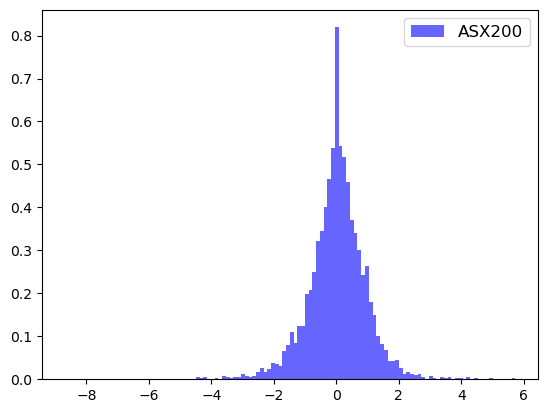

In [58]:
#Plot histogram for ASX200
plt.hist(data['R_a'],bins=120,label='ASX200', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
plt.show()

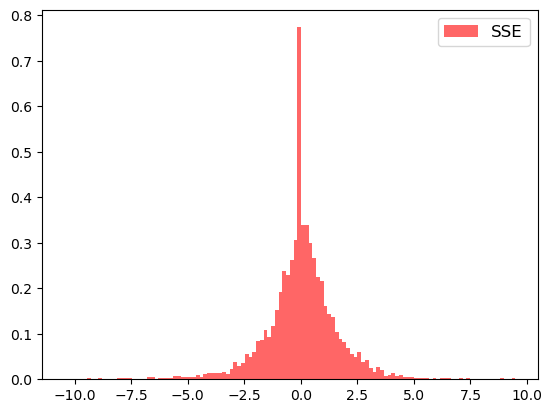

In [59]:
#Plot histogram for SSE
plt.hist(data['R_sse'],bins=120,label='SSE', density=True, alpha=0.6, color='r')
plt.legend(loc='best', fontsize='large')
plt.show()

/usr/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_a', ylabel='Density'>

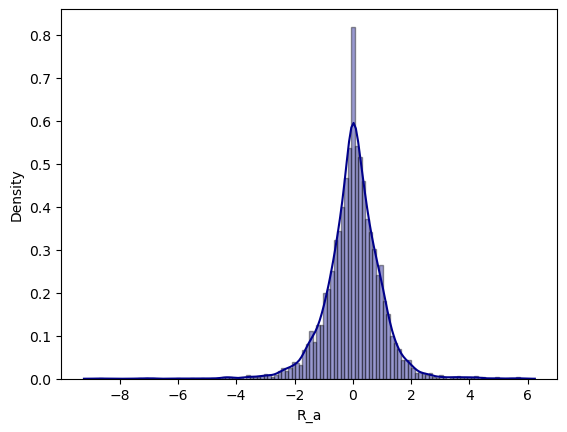

In [60]:
import seaborn as sns
sns.distplot(data['R_a'],hist=True, kde=True, bins=int(120), color= 'darkblue',hist_kws={'edgecolor':'black'})

/usr/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_sse', ylabel='Density'>

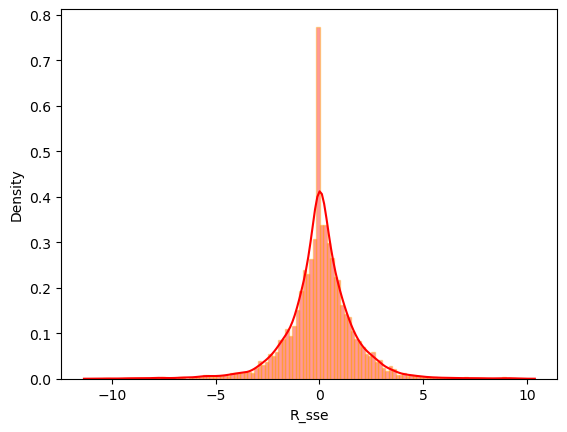

In [61]:
sns.distplot(data['R_sse'],hist=True, kde=True, bins=int(120), color= 'red', hist_kws={'edgecolor':'orange'})

# Plot

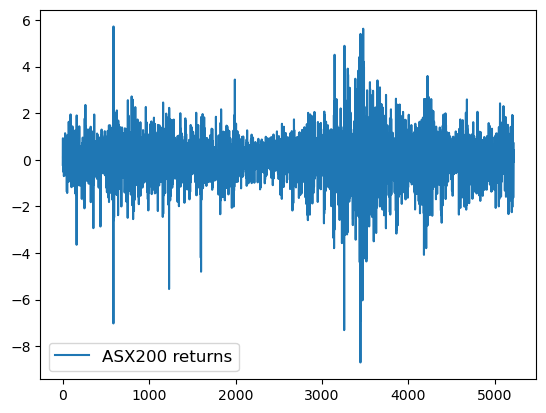

In [62]:
#Plotting the ASX200 returns series
plt.plot(data.R_a,label='ASX200 returns')
plt.legend(loc='best', fontsize='large')
plt.show()

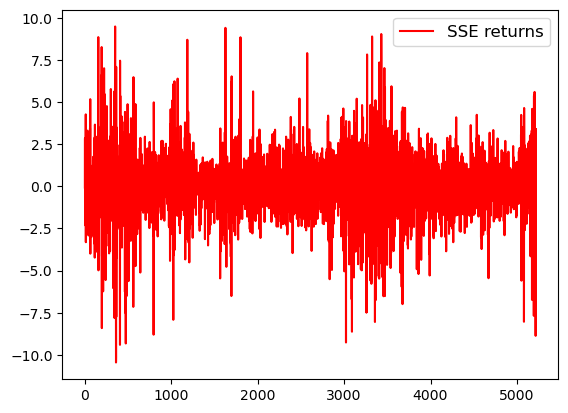

In [63]:
#Plotting SSE returns series
plt.plot(data.R_sse,label= 'SSE returns',color='red')
plt.legend(loc='best', fontsize='large')
plt.show()

In [64]:
#Computing correlation
from scipy.stats import pearsonr
Correlation=pearsonr(data.R_a,data.R_sse)
Correlation

(0.1730041933979001, 2.4234124539919497e-36)

The Pearson's correlation between the two return series of ASX 200 and SSE is 0.17

# Autocorrelation (ACF) graph

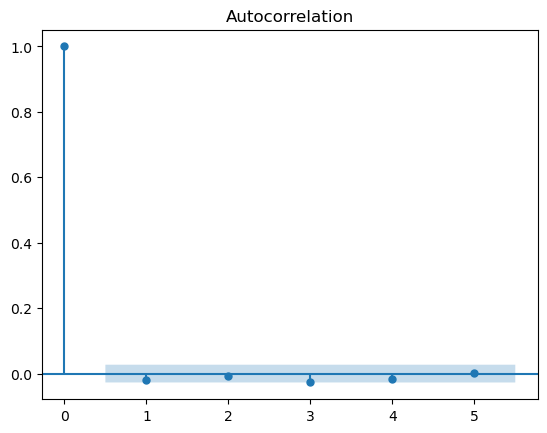

In [65]:
from statsmodels.graphics import tsaplots
fig =tsaplots.plot_acf(data['R_a'],lags=5)
plt.show()

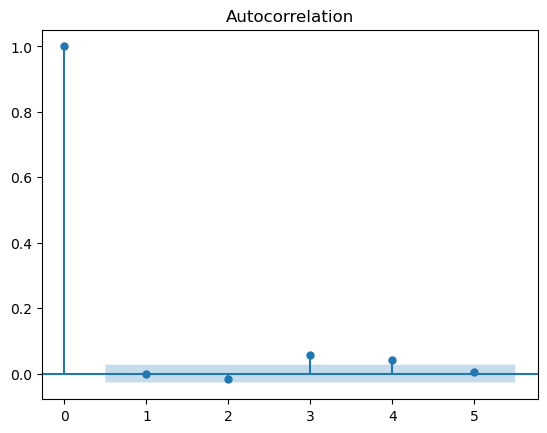

In [66]:
fig =tsaplots.plot_acf(data['R_sse'],lags=5)
plt.show()

# Autocorrelation coefficients at multiple lags

In [67]:
import statsmodels.api as sm
sm.tsa.acf(data['R_a'])

/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00, -2.00819036e-02, -7.45621736e-03, -2.59732010e-02,
       -1.59731301e-02,  6.21230060e-04, -1.76336711e-02, -1.55468191e-02,
       -1.50533801e-02,  2.42828613e-02,  5.09979156e-03, -1.20443357e-02,
       -7.90596922e-03,  1.16266121e-02, -9.44871407e-04, -1.14682419e-03,
       -8.27634852e-03,  1.25941056e-02, -2.52951690e-02,  8.15456959e-03,
       -4.90550380e-03,  1.19753088e-02, -1.13968485e-02,  4.71589237e-03,
       -2.09316328e-02,  2.11629759e-02, -8.17081382e-03,  7.62250565e-03,
        2.73483195e-02, -5.20350748e-03,  3.44330214e-03, -6.66124582e-03,
       -1.02522505e-02,  1.77346608e-02, -1.95879331e-02, -1.29511264e-02,
       -1.43985714e-02,  1.29777824e-02,  7.13354214e-03, -7.65878735e-03,
        2.65162260e-02])

In [68]:
sm.tsa.acf(data['R_sse'])

array([ 1.00000000e+00, -1.77049756e-03, -1.76342144e-02,  5.79484537e-02,
        4.28343804e-02,  4.74141360e-03, -3.01447017e-02,  1.15330435e-03,
       -4.88721289e-03, -1.90151272e-02,  4.85124876e-03, -1.93491880e-02,
        2.67238022e-02,  2.05308073e-02, -4.08790279e-03,  6.22617857e-02,
        1.52070544e-02,  2.41202057e-02,  6.66707910e-04, -3.56191982e-02,
        3.83645998e-02, -4.14936981e-02,  2.52851825e-02, -1.23808014e-02,
       -1.95174798e-02, -1.47871696e-02,  1.28303299e-02, -3.31447306e-03,
       -1.65438605e-02,  6.25110694e-02,  2.99159141e-03, -4.30915903e-03,
        1.16498707e-02,  8.18669819e-03,  1.35146257e-02,  5.33048366e-04,
        1.83304643e-02,  2.87361987e-03, -1.86447798e-02,  2.46929314e-02,
        4.33252016e-02])